# Face detection with OpenCv
## Setup

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Open and plot the image
How to cage Nicolas cage with OpenCV ?


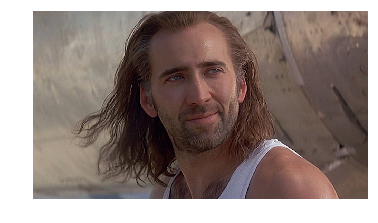

In [2]:
img = cv2.imread('cage.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig = plt.figure("Cage uncaged")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Haar cascade classifiers

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


In [4]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.circle(roi_color, (ex+25,ey+25), 40, (0,255,0),2)

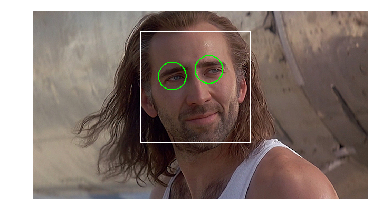

In [5]:
fig = plt.figure("Cage caged")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Real time face detection with your webcam

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)    
    
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()